<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


**<h1>Mean Shift Clustering </h1>**


Estimated time needed: **30** minutes


As you hike in the mountains, you stumble upon a plant you have never seen before. You look around and you spot a few more of them. The similarities between them tell you that they probably belong to the same group of plants. However, you are not a botanist, so you can't know exactly which species these plants belong to. This task can be solved with the help of clustering analysis. Clustering can identify the groups of similar looking objects and group them together based on their similar instances.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/images/hiking.jpg" width="70%">

Image from [PxHere](https://pxhere.com/en/photo/1067051?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01)


In this notebook, we will explore Mean Shift Clustering, which is a **non-parametric centroid-based clustering** algorithm. Mean Shift Clustering attempts to group data without having first to be trained on the labeled data. Unlike the K-Means Clustering, when using the Mean Shift, we don't need to specify the number of clusters beforehand. Mean Shift Clustering is used in a wide variety of applications, such as image segmentation, academic ranking systems, search engines, medicine, and many others. 

In the first part of this notebook, we will focus on the image segmentation, which is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.

In the second part of this notebook, we will show how to use the Mean Shift Clustering to classify the survivors rates of the Titanic, the most famous shipwreck in history. Based on the passengers' features (e.g. age, ticket class, fare, etc.) we will classify the passengers into clusters with different survival probabilities. 


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
   <li>
        <a href="#Mean Shift for Image Segmentation">Mean Shift for Image Segmentation</a>
        <ol>
            <li><a href="#Pre-processing Image">Pre-processing Image</a></li> 
            <li><a href="#Apply Mean Shift to the Image">Apply Mean Shift to the Image</a></li>         
        </ol>
    </li>    
    <li>
        <a href="#Exercises">Exercises</a>
        <ol>
            <li><a href="#Exercise 1 - Repeat the above image segmentation process for a new image on the internet">Exercise 1 - Repeat the above image segmentation process for a new image on the internet</a></li>
            <li><a href="#Exercise 2 - Mean Shift Applied to the Titanic Dataset ">Exercise 2 - Mean Shift Applied to the Titanic Dataset</a></li>
        </ol>       
    </li>
    <li>
        <a href="#How Mean Shift Works (Optional)">How Mean Shift Works (Optional)</a>
        <ol>
            <li><a href="#Kernel Density Estimation">Kernel Density Estimation</a></li>
            <li><a href="#Mean Shift From Scratch">Mean Shift From Scratch</a></li>
        </ol>
    </li>    
</ol>


----


<h2>Objectives</h2>


After completing this lab you will be able to:


- **Understand** Kernel Density Estimation (KDE).
- **Describe** how Mean Shift Works from scratch.
- **Implement** Mean Shift for image segmentation.


<h2 id='Setup'>Setup</h2>


For this lab, we will be using the following libraries:
 - [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for managing the data.
 - [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for mathematical operations.
 - [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for machine learning and machine-learning-pipeline related functions.
 - [`openCV`](https://opencv.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) OpenCV provides a real-time optimized Computer Vision library, tools, and hardware. 
 - [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for additional plotting tools.


### Installing Required Libraries

The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [31]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 scikit-learn==0.20.1 scipy==1.7.3
# Note: If your environment doesn't support "!mamba install", use "!pip install pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 scikit-learn==0.20.1 scipy==1.7.3"

In [32]:
# !pip install opencv-python

### Importing Required Libraries


In [33]:
# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
from mpl_toolkits import mplot3d
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import requests

<p style="color:blue">If you wish to learn in detail about how Mean Shift works before studying its applications, you can go to <a href="#E_1"> How Mean Shift Works (Optional)</a> section first. </P> 


<h2 id="Exercise_1">Mean Shift for Image Segmentation   </h2> 


### Pre-processing Image 


Mean Shift Clustering can be used for image segmentation. An image segmentation attempts to cluster an image pixels according to their color. It then replaces each pixel's color with the mean color of its cluster. This way considerably reduces the number of different colors in the image. So, each cluster represents the mode or the most common intensities. Every pixel is labeled according to the cluster it’s nearest to. Consider the following image.


Download the image:


In [34]:
# import skillsnetwork
# await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/peppers.jpeg", overwrite=True)

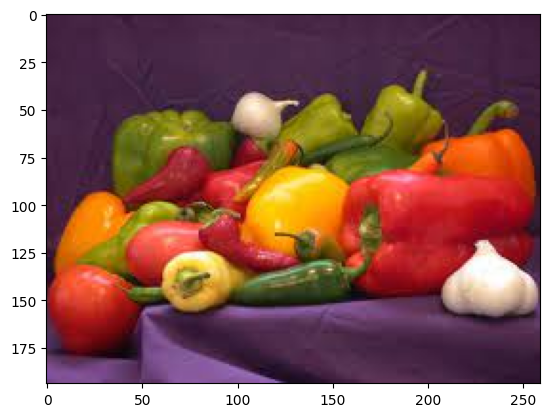

In [35]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/peppers.jpeg'

response = requests.get(url)
img_arr = np.asarray(bytearray(response.content), dtype=np.uint8)
img = cv.imdecode(img_arr, cv.IMREAD_COLOR)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

# img = cv.imread('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/peppers.jpeg')
# plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
# plt.show()

We will pre-process the image by smoothing it.  


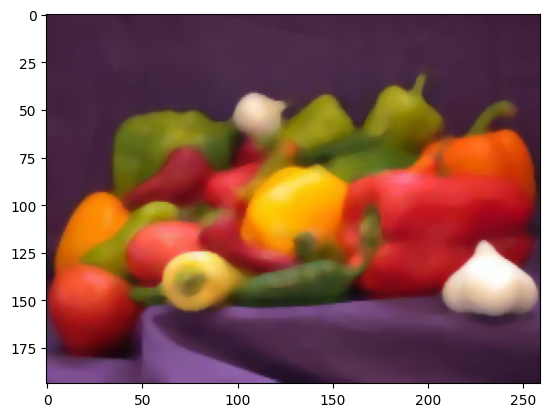

In [36]:
img = cv.medianBlur(img, 7)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

We can plot the Red, Green, Blue (RGB) values as 3D points. 


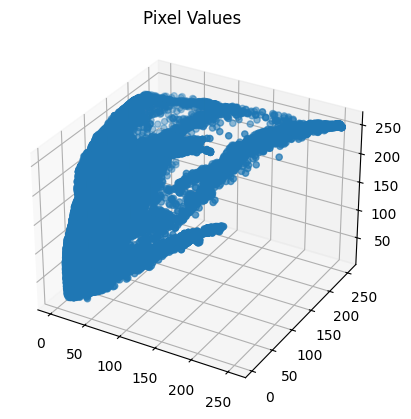

In [37]:
ax = plt.axes(projection ="3d")
ax.scatter3D(img[:,:,0],img[:,:,1],img[:,:,2])
ax.set_title('Pixel Values ')
plt.show()

We have a rectangular image with three channels.   


In [38]:
img.shape

(194, 259, 3)

We convert the image to 194 x 259 rows (194 x 259 = 50246, which is the shape of our matrix) for each pixel, and three columns for each color channel (Red, Green, Blue), as a numpy array of <code>X</code>:


In [39]:
X = img.reshape((-1,3))
print("shape: ",X.shape)
print("data type   : ",X.dtype)

shape:  (50246, 3)
data type   :  uint8


As we see, the data type is `unit8`, so, we need to cast it to be a `float32`:


In [40]:
X = np.float32(X)

### Apply Mean Shift to the Image 


Estimate the bandwidth to use with the mean-shift algorithm, using the <code>estimate_bandwidth</code> function:
- <code>X</code>: array-like of shape <code>(n_samples, n_features)</code>
Input points.
- <code>quantile</code>: float, default=0.3 Should be between [0, 1], 0.5 means that the median of all pairwise distances is used.
- <code>n_samples</code>: int, The number of samples to be used. If not given, all samples are to be used.


In [41]:
bandwidth = estimate_bandwidth(X, quantile=.06, n_samples=3000)
bandwidth 

np.float64(33.51403269933768)

We can create a <code>MeanShift</code> object in sklearn with the following parameters:
- <code>bandwidth</code>:float, default=None
Bandwidth used in the RBF kernel.
- <code>max_itert</code>: (default=300) Maximum number of iterations per seed point before the clustering operation terminates (for that seed point), if has not converged yet.
- <code>bin_seeding</code> :if true, initial kernel locations are not locations of all points, but rather the location of the discretized version of points.

We then fit the model.


In [42]:
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(X)

,bandwidth,np.float64(33.51403269933768)
,seeds,None
,bin_seeding,True
,min_bin_freq,1
,cluster_all,True
,n_jobs,None
,max_iter,300


Now, we have the label corresponding to the label of each row.


In [43]:
labeled=ms.labels_
labeled

array([0, 0, 0, ..., 0, 0, 0], shape=(50246,))

For each sample, we can find the assigned clusters:


In [44]:
clusters=ms.predict(X)
clusters

array([0, 0, 0, ..., 0, 0, 0], shape=(50246,))

We can list the unique clusters.  


In [45]:
np.unique(labeled)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

We can also list the actual cluster centroid locations, which are also the RGB values:


In [46]:
ms.cluster_centers_

array([[ 67.19606 ,  37.927944,  70.074814],
       [ 32.38643 ,  29.431494, 173.7524  ],
       [ 25.335648,  94.10284 ,  98.0142  ],
       [ 25.08942 , 130.47505 , 141.56128 ],
       [127.69194 ,  73.29858 , 115.98683 ],
       [ 14.098269,  95.66574 , 230.2173  ],
       [  9.878764, 132.11331 , 245.06735 ],
       [  8.750482, 182.74567 , 251.81984 ],
       [158.78459 , 185.80435 , 217.75691 ],
       [191.184   , 215.884   , 241.426   ],
       [240.2958  , 246.98953 , 251.78273 ],
       [ 88.08382 , 214.68497 , 249.59248 ]], dtype=float32)

We can convert the clusters `unit8` datatype for images: 


In [47]:
cluster_int8=np.uint8(ms.cluster_centers_)
cluster_int8

array([[ 67,  37,  70],
       [ 32,  29, 173],
       [ 25,  94,  98],
       [ 25, 130, 141],
       [127,  73, 115],
       [ 14,  95, 230],
       [  9, 132, 245],
       [  8, 182, 251],
       [158, 185, 217],
       [191, 215, 241],
       [240, 246, 251],
       [ 88, 214, 249]], dtype=uint8)

We can also estimate what cluster each sample belongs to, as follows: 


In [48]:
ms.predict(X)

array([0, 0, 0, ..., 0, 0, 0], shape=(50246,))

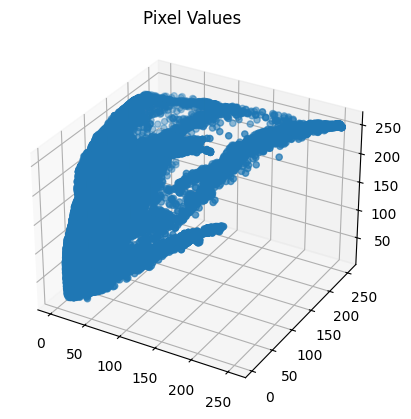

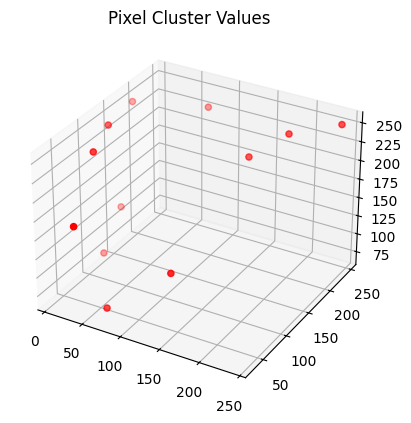

In [49]:
ax = plt.axes(projection ="3d")
ax.scatter3D(img[:,:,0],img[:,:,1],img[:,:,2])
ax.set_title('Pixel Values ')
plt.show()

ax = plt.axes(projection ="3d")
ax.set_title('Pixel Cluster Values  ')
ax.scatter3D(cluster_int8[:,0],cluster_int8[:,1],cluster_int8[:,2],color='red')
plt.show()

We can assign each data point to the cluster value and reshape it back  to a Rectangular image. 


In [50]:
result=np.zeros(X.shape,dtype=np.uint8)

for label in np.unique(labeled):
    result[labeled==label,:]=cluster_int8[label,:]    
    

result=result.reshape(img.shape)

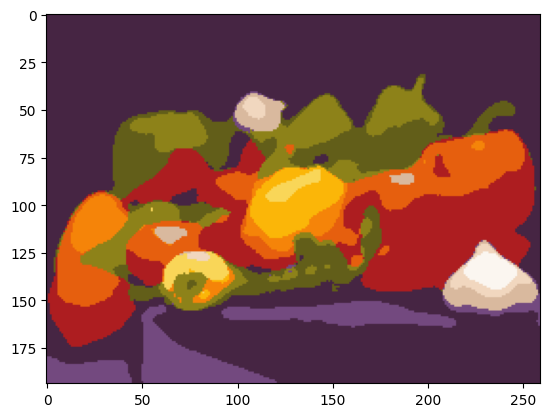

In [51]:
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.show()

We now plot each cluster, as a cluster value, and we see that each cluster corresponds to a different object. 


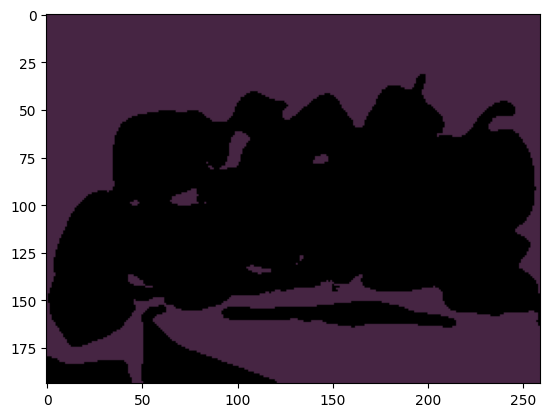

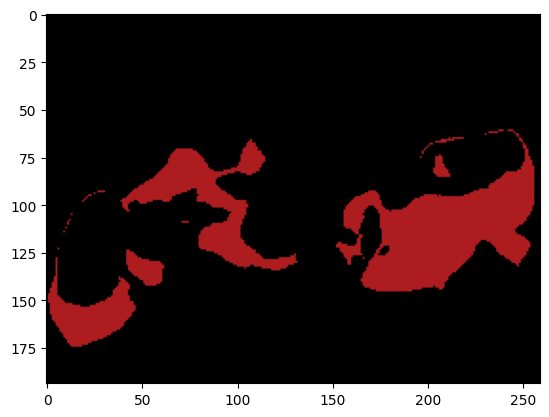

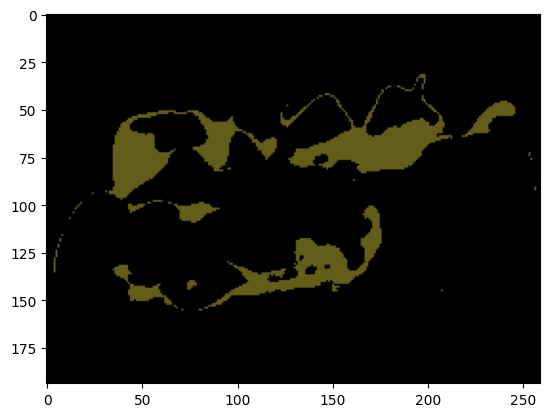

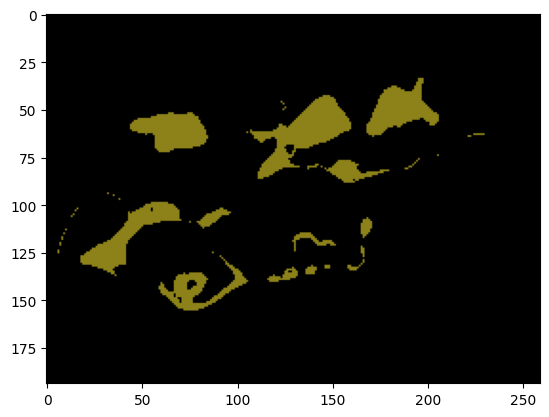

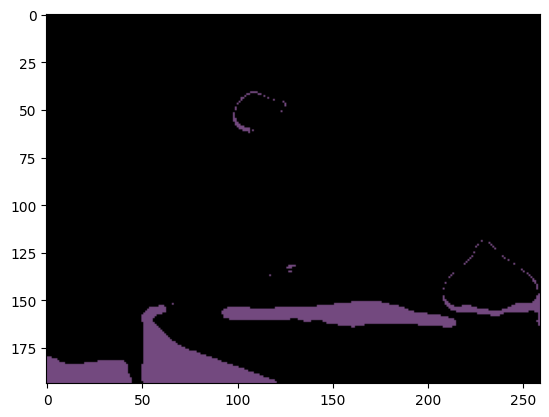

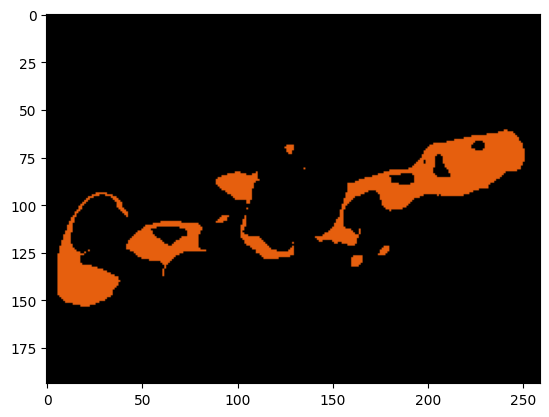

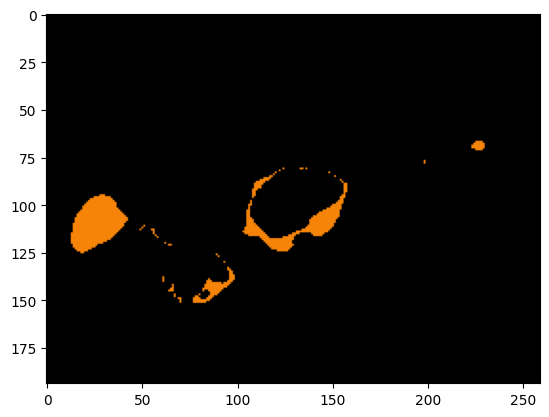

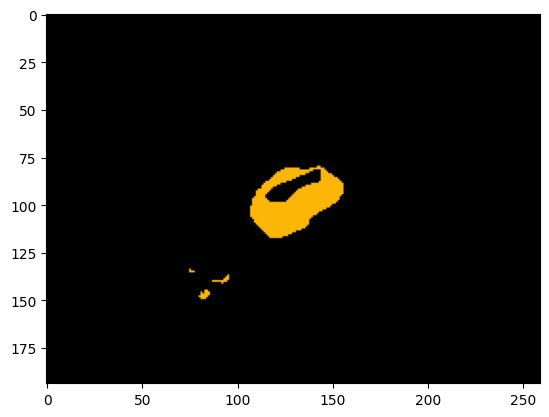

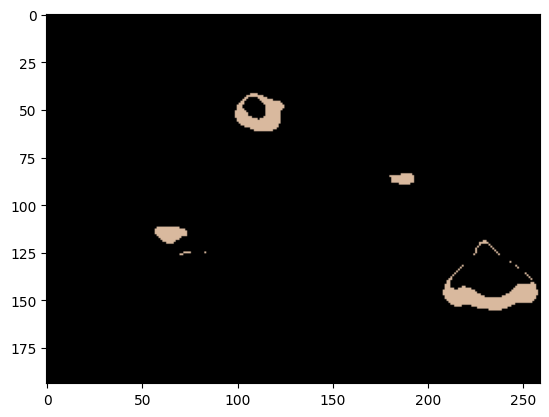

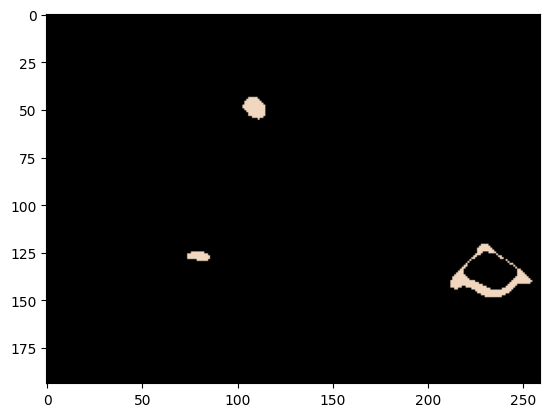

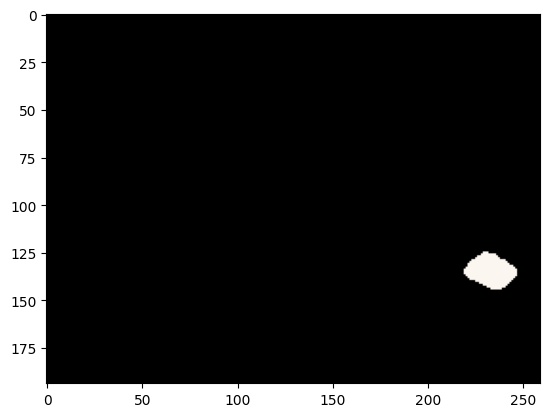

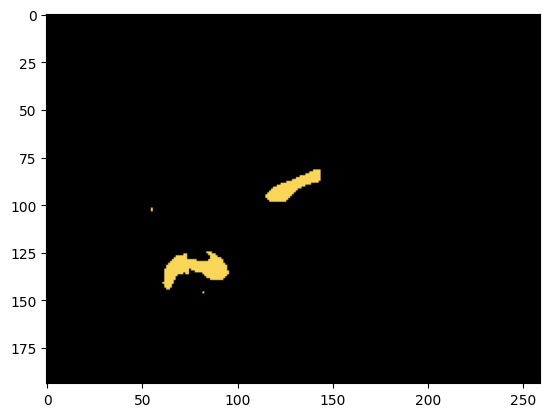

In [52]:
for label in np.unique(labeled):
    result=np.zeros(X.shape,dtype=np.uint8)
    result[labeled==label,:]=cluster_int8[label,:]  
    plt.imshow(cv.cvtColor(result.reshape(img.shape), cv.COLOR_BGR2RGB))
    plt.show()

Therefore, we have classified our images according to their different vegetable types, using the Mean Shift Clustering.


## Exercises


### Exercise 1 - Repeat the above image segmentation process for a new image on the internet


Run the cell below to download the image from the web:


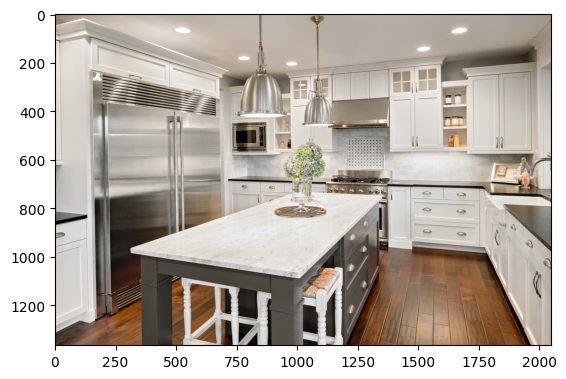

In [53]:
import requests 
url='https://www.plastform.ca/wp-content/themes/plastform/images/slider-image-2.jpg'
name="my_file.jpg"

with open(name, 'wb') as file:
    file.write(requests.get(url, stream=True).content)
    
img = cv.imread(name)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

Now it's your turn to play around with the **MeanShift** algorithm.


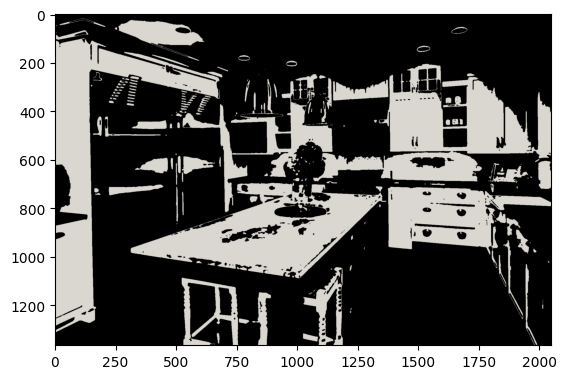

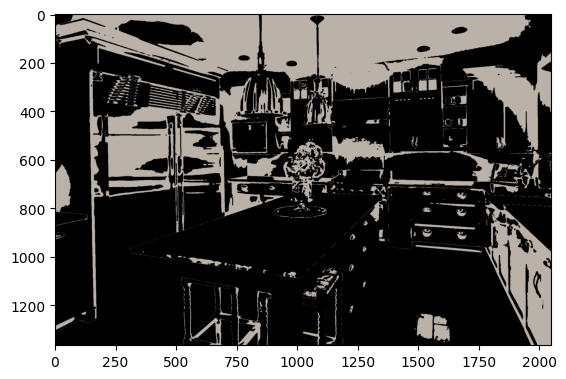

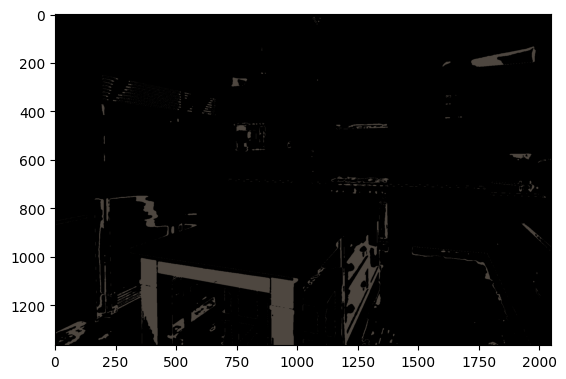

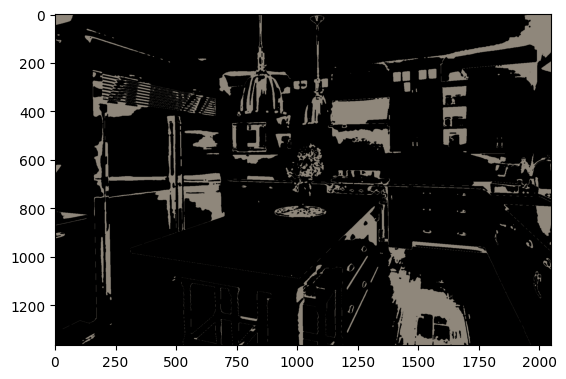

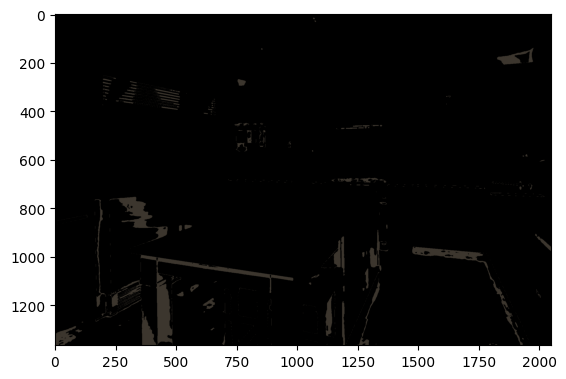

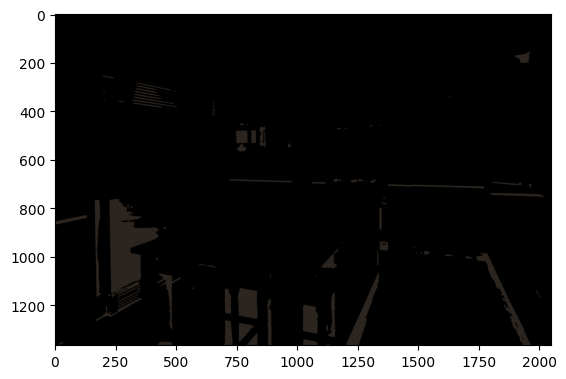

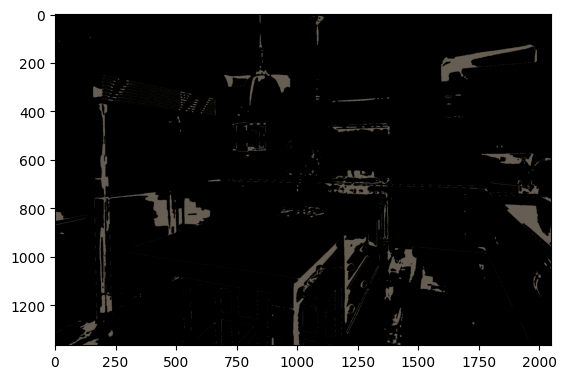

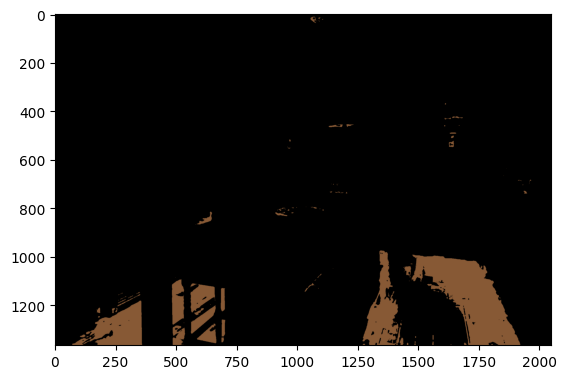

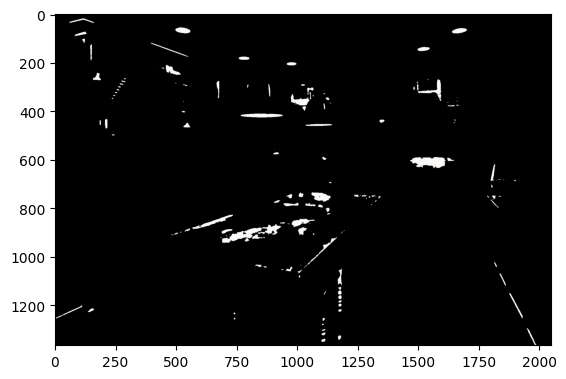

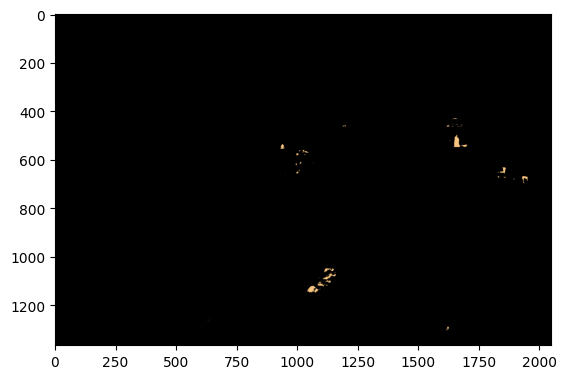

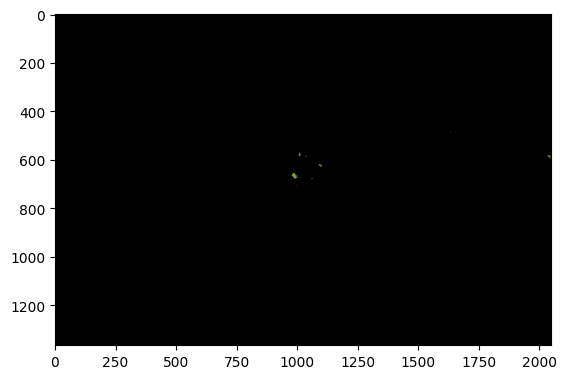

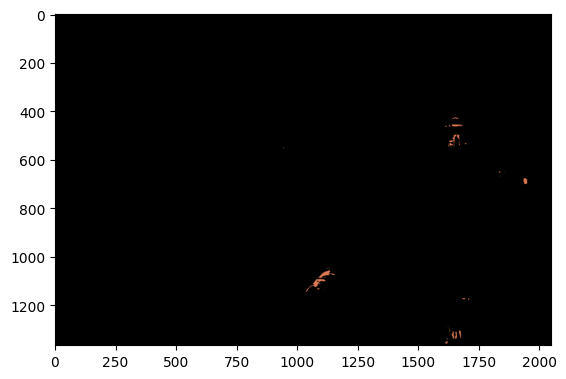

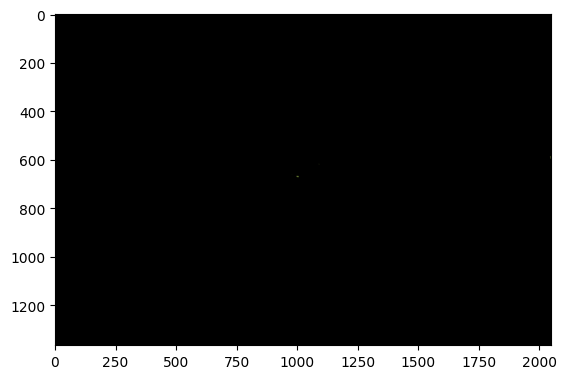

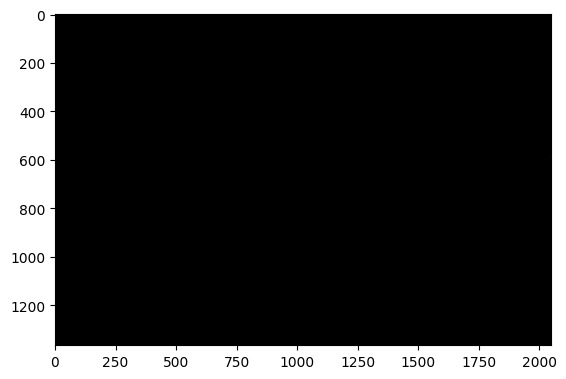

In [54]:
img = cv.medianBlur(img, 7)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
X = img.reshape((-1,3))
X = np.float32(X)
bandwidth = estimate_bandwidth(X, quantile=.06, n_samples=3000)
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(X)
labeled=ms.labels_
cluster_int8=np.uint8(ms.cluster_centers_)
result=np.zeros(X.shape,dtype=np.uint8)
labeled=ms.labels_
result=np.zeros(X.shape,dtype=np.uint8)

for label in np.unique(labeled):
    result[labeled==label,:]=cluster_int8[label,:]    
    
    cluster_int8[label]
result=result.reshape(img.shape)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))

for label in np.unique(labeled):
    result=np.zeros(X.shape,dtype=np.uint8)
    result[labeled==label,:]=cluster_int8[label,:]  
    plt.imshow(cv.cvtColor(result.reshape(img.shape), cv.COLOR_BGR2RGB))
    plt.show()

<details>
    <summary>Click here for Solution</summary>
    
```python
img = cv.medianBlur(img, 7)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
X = img.reshape((-1,3))
X = np.float32(X)
bandwidth = estimate_bandwidth(X, quantile=.06, n_samples=3000)
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(X)
labeled=ms.labels_
cluster_int8=np.uint8(ms.cluster_centers_)
result=np.zeros(X.shape,dtype=np.uint8)
labeled=ms.labels_
result=np.zeros(X.shape,dtype=np.uint8)

for label in np.unique(labeled):
    result[labeled==label,:]=cluster_int8[label,:]    
    
    cluster_int8[label]
result=result.reshape(img.shape)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))

for label in np.unique(labeled):
    result=np.zeros(X.shape,dtype=np.uint8)
    result[labeled==label,:]=cluster_int8[label,:]  
    plt.imshow(cv.cvtColor(result.reshape(img.shape), cv.COLOR_BGR2RGB))
    plt.show()
    
```

</details>


### Exercise 2 - Mean Shift Applied to the  Titanic Dataset 


On April 15, 1912, the  Titanic collided with an iceberg and sank. When the Titanic sank, it killed 1502 out of 2224 passengers and crew. In this section you will apply Mean-Shift clustering on features such as age, gender, class, etc. We will then determine if there is a relationship between survival and the different clusters. The following table summarizes the data:


<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>


#### Data Pre-Processing: 


Let’s load the dataset.  


In [55]:
# await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/titanic.csv", overwrite=True)

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can drop the following columns <code>'Name','Ticket','Cabin','PassengerId','Embarked' </code> for simplicity.


In [56]:
df=df.drop(columns=['Name','Ticket','Cabin','PassengerId','Embarked'])

We will assign "0" to "female" sex, and "1" to "male" sex, known as feature binarization. 


In [57]:
df.loc[df['Sex']!='male','Sex']=0
df.loc[df['Sex']=='male','Sex']=1

In [58]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


We will check for missing values.   


In [59]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

Here, we replace the  missing values in age, with the average age.


In [60]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

We will assign the dataframe to X, for clustering, and drop our target, the <code>Survival</code>  column. 


In [61]:
X=df.drop(columns=['Survived'])

Now, we will standardize the data  <code>X</code>:


In [62]:
X=df.apply(lambda x: (x-x.mean())/(x.std()+0.0000001), axis=0)

In [63]:
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,-0.788829,0.826913,0.737281,-0.592148,0.432550,-0.473408,-0.502163
1,1.266278,-1.565228,-1.354812,0.638430,0.432550,-0.473408,0.786404
2,1.266278,0.826913,-1.354812,-0.284503,-0.474279,-0.473408,-0.488580
3,1.266278,-1.565228,-1.354812,0.407697,0.432550,-0.473408,0.420494
4,-0.788829,0.826913,0.737281,0.407697,-0.474279,-0.473408,-0.486064


#### Apply the mean-shift to Titanic data frame X:


To apply the mean-shift algorithm to X, first use the <code>estimate_bandwidth</code> function to estimate the value for the bandwidth parameter. Then create a MeanShift object and fit it to X:


In [64]:
bandwidth = estimate_bandwidth(X)
ms = MeanShift(bandwidth=bandwidth , bin_seeding=True)
ms.fit(X)

,bandwidth,np.float64(2.6395838673142666)
,seeds,None
,bin_seeding,True
,min_bin_freq,1
,cluster_all,True
,n_jobs,None
,max_iter,300


<details>
    <summary>Click here for Solution</summary>
    
```python
bandwidth = estimate_bandwidth(X)
ms = MeanShift(bandwidth=bandwidth , bin_seeding=True)
ms.fit(X)
```

</details>


Next, we append the clusters to the dataset for analysis. 


In [65]:
X['cluster']=ms.labels_
df['cluster']=ms.labels_

Now, we group by clusters, to see that certain clusters have a larger chance of survival. 


In [66]:
df.groupby('cluster').mean().sort_values(by=['Survived'], ascending=False)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
cluster,,,,,,,
5,1.000000,1.000000,0.666667,35.333333,0.000000,0.333333,512.329200
4,0.750000,1.000000,0.285714,27.822048,0.857143,1.250000,195.894643
0,0.381313,2.313131,0.676768,30.734477,0.285354,0.199495,23.992865
3,0.307692,2.846154,0.153846,38.692308,0.769231,4.230769,29.377562
1,0.260870,2.913043,0.5,8.745575,3.239130,1.543478,30.968026
2,0.000000,3.000000,0.571429,29.699118,8.000000,2.000000,69.550000
6,0.000000,1.000000,1.0,61.000000,0.500000,3.000000,188.137500


From the table above, we see that there are 7 clusters generated by the mean-shift analysis, each cluster contains the average percentage of survivors. 

For instance, cluster 5, has 100 % of survivors, with the average age of 35.3, passengers belonging to the 1st class, and the passengers who paid the highest fare, 512.33 per ticket. Interestingly, Cluster 6, has 0 % of survivors, with the average age of 61, also belonging to the 1st class and in the mid-range ticket fare. It is not surprising that the highest odds for survival were held by the younger and richer groups of passengers.


<h2 id="E_1">How Mean Shift Works (Optional) </h2> 


Mean Shift algorithm starts by placing a circle centered on each instance; then for each circle it computes the mean of all the instances located within it, and it shifts the circle so that it is centered on the mean. Next, it iterates this mean-shifting step until all the circles stop moving (i.e., until each of them is centered on the mean of the instances it contains). Mean Shift shifts the circles in the direction of higher density, until each of them has found a local density maximum. Finally, all the instances whose circles have settled in the same place (or close enough) are assigned to the same cluster. 

In the following section, we will review Kernel Density Estimation, then we will derive the Mean Shift vector, and show how it finds the maximum values of the distribution. This section is optional and you can skip it and go to the next sections, where we apply the Mean Shift algorithm to the real data. 


<h3>Kernel Density Estimation </h3>


Let's say we have $\{\boldsymbol{x}_{1},..,\boldsymbol{x}_{n}\}$ D  dimensional samples, it can be  difficult to calculate   the histogram for density estimation, but we can represent the density using  Kernel Density Estimation (KDE). The Kernel is a Function of $\boldsymbol{x}$ and the sample $\boldsymbol{x}_i$, for example, the  Gaussian kernel of the  $i-th$ sample is given by:


 $K_{h}(\boldsymbol{x}-\boldsymbol{x}_{i})={\frac {1}{{\sqrt {2\pi h }^D} }}e^{-{\frac {|\boldsymbol{x}-\boldsymbol{x}_{i}|^{2}}{2h^{2}}}}$


$h$ is a bandwidth parameter and it is a free parameter, we can code the kernel in Python as a function of the distance  $|\boldsymbol{x}-\boldsymbol{x}_{i}|^{2}$ and $h$ :


In [67]:
def gaussian(d, h):
    return np.exp(-0.5*((d/h))**2) / (h*math.sqrt(2*math.pi))

There are many types of kernels, we chose the Gaussian Kernel for simplicity.


We can calculate the Kernel  function  for $x_1=1$, which we will refer to as sample <code>s</code>, $x$ will be in the range between $-2<x<4$. 
We will try it for $h=1$ and $h=3$.


In [68]:
s=1 # a sample point

x = np.linspace(-2, 4, num=200)
dist=np.sqrt(((x-s)**2))
kernel_1=gaussian(dist, 1)
kernel_2=gaussian(dist, 3)

We can plot the kernel functions for the different values of $h$ , and overlay the histogram, which is zero everywhere, except where the data point exists:


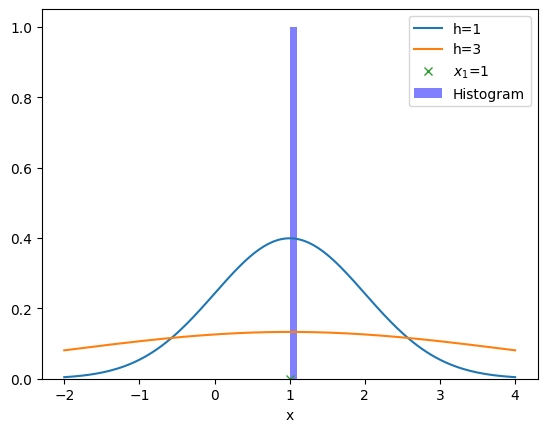

In [69]:
plt.plot(x,kernel_1,label='h=1')
plt.plot(x,kernel_2,label='h=3')
plt.plot(s,0,'x',label="$x_{1}$=1")
plt.hist(s, 10, facecolor='blue', alpha=0.5,label="Histogram")
plt.xlabel('x')
plt.legend()
plt.show()


We see that for x close to our sample point ($x_{1}$ = 1), the gaussian kernel function returns larger values; for x far away from $x_{1}$, the kernel function gives smaller values that are approaching 0.


For many samples the  KDE is given by:


 ${\hat {f}}_{h}(x)={\frac {1}{n h^{D}}}\sum _{i=1}^{n}K_{h}(\boldsymbol{x}-\boldsymbol{x}_{i})$


In Python, we generate the KDE with bandwith $h$ for set of point $x_i$, stored in the NumPy array <code>S</code>, in the range of $x$ as follows:


In [70]:
def kernel_density(S,x,h=1):

    density=np.zeros((200))
    for s in S:
        #Determine the distance and kernel for each point 
        dist=np.sqrt(((x-s)**2))
        kernel=gaussian(dist, h)
        #Find the sum  
        density+=kernel
    #Normalize the sum  
    density=density/density.sum() 
    
    return density

Consider the following data points:  


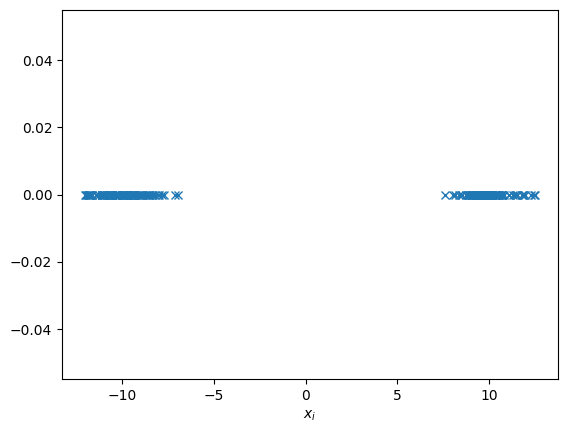

In [71]:
S=np.zeros((200))
S[0:100] = np.random.normal(-10, 1, 100)
S[100:200]=np.random.normal(10, 1, 100)
plt.plot(S,np.zeros((200)),'x')
plt.xlabel("$x_{i}$")
plt.show()

We can generate the density in a specified region $x$.


In [72]:
x = np.linspace(S.min()-3, S.max()+3, num=200)
density=kernel_density(S,x)

We can plot the results along with clusters locations. They should correspond to the two peaks of the distribution.   


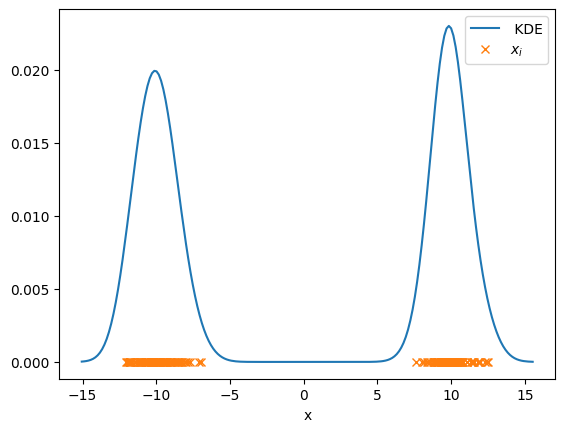

In [73]:
plt.plot(x,density,label=" KDE")
plt.plot(S,np.zeros((200,1)),'x',label="$x_{i}$")
plt.xlabel('x')
plt.legend()
plt.show()

To find the two maximums we can apply the Gradient Ascent to each vector  $\{\boldsymbol{x}_{1},..,\boldsymbol{x}_{n}\}$:


$ \boldsymbol{\hat{x}}^{k+1}_i := \boldsymbol{\hat{x}}^{k}_i + \eta \nabla {\hat {f}}_{h}(\boldsymbol{\hat{x}}^{k}_i) $


For example, we set for $\boldsymbol{\hat{x}}^{0}_{1}=\boldsymbol{x}_1$, then apply:


$ \boldsymbol{\hat{x}}^{k+1}_1 := \boldsymbol{\hat{x}}^{k}_1 + \eta \nabla {\hat {f}}_{h}(\boldsymbol{\hat{x}}^{k}_1) $


 for $\boldsymbol{\hat{x}}^{0}_{2}=\boldsymbol{x}_2$, then apply:


$ \boldsymbol{\hat{x}}^{k+1}_2 := \boldsymbol{\hat{x}}^{k}_2 + \eta \nabla {\hat {f}}_{h}(\boldsymbol{\hat{x}}^{k}_2) $


Mean Shift is an alternative method for selecting a good value for $\eta$ and $h$ , so that each $ \boldsymbol{\hat{x}}^{k+1}_i$ should approach the two maximums.


<h3>Mean Shift From Scratch  </h3>


In order to find the peak of the distribution, we calculate the gradient. The mean shift vector is proportional to the gradient and always points toward the direction of the maximum increase in density. The expression for the mean shift is shown here along with the Python code: 


 $\nabla  {\hat {f}}_{h}(\boldsymbol{x}) \varpropto\ \boldsymbol{m}_h(\boldsymbol{x})=\frac{ \sum_{i} K'(\boldsymbol{x}_i - \boldsymbol{x}) \boldsymbol{x}_i } {\sum_{i} K'(\boldsymbol{x}_i - \boldsymbol{x})}-\boldsymbol{x} $


 where $K'$ is the derivative of the kernel,  we can output the mean shift values for <code>S</code> as follows:


In [74]:
mean_shift=((density.reshape(-1,1)*S).sum(0) / density.sum())-x

If we overlay the mean shift value over the distribution, $\boldsymbol{m}_h(\boldsymbol{x})$, we will see that vectors point towards the two peaks.


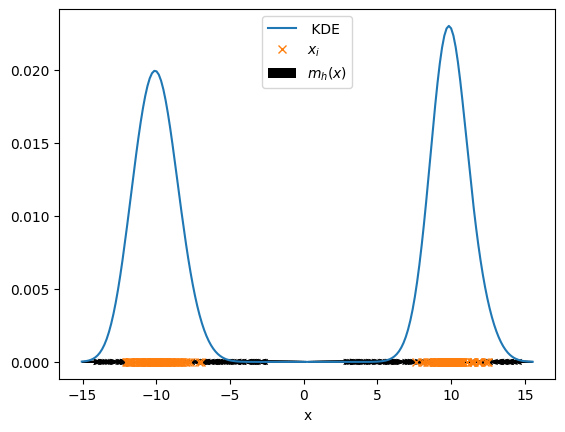

In [75]:
plt.plot(x,density,label=" KDE")
plt.plot(S,np.zeros((200,1)),'x',label="$x_{i}$")
plt.quiver(x, np.zeros((200,1)),mean_shift, np.zeros((200,1)), units='width',label="$m_{h}(x)$")
plt.xlabel('x')
plt.legend()
plt.show()

By plugging in the value of  the mean shift vector into the expression  for gradient ascent, we get:


$ \boldsymbol{\hat{x}}^{k+1}_i := \boldsymbol{\hat{x}}^{k}_i + \eta \nabla {\hat {f}}_{h}(\boldsymbol{\hat{x}}^{k}_i) \approx\boldsymbol{x}^{k}_i +  \boldsymbol{m}_h(\boldsymbol{\hat{x}}^{k}_i)$


$ \boldsymbol{\hat{x}}^{k+1}_i := \boldsymbol{\hat{x}}^{k}_i +\frac{ \sum_{i} K(\boldsymbol{x}_i -\boldsymbol{\hat{x}}^{k}_i) \boldsymbol{x}_i } {\sum_{i} K(\boldsymbol{x}_i - \boldsymbol{\hat{x}}^{k}_i)}-\boldsymbol{\hat{x}}^{k}_i$


$ \boldsymbol{\hat{x}}^{k+1}_i := \frac{ \sum_{i} K(\boldsymbol{x}_i -\boldsymbol{\hat{x}}^{k}_i) \boldsymbol{x}_i } {\sum_{i} K(\boldsymbol{x}_i - \boldsymbol{\hat{x}}^{k}_i)}$


We can run the algorithm  for three iterations, each point should converge to the cluster centers :


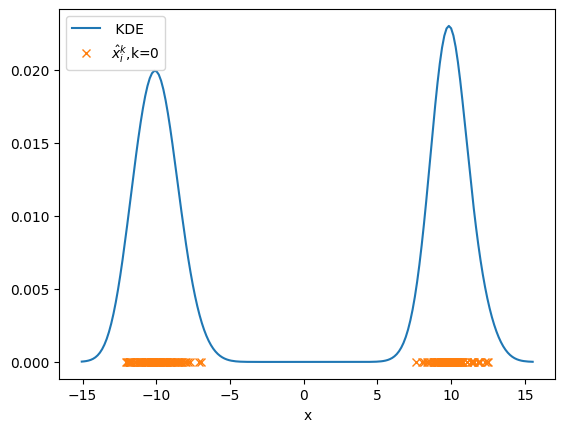

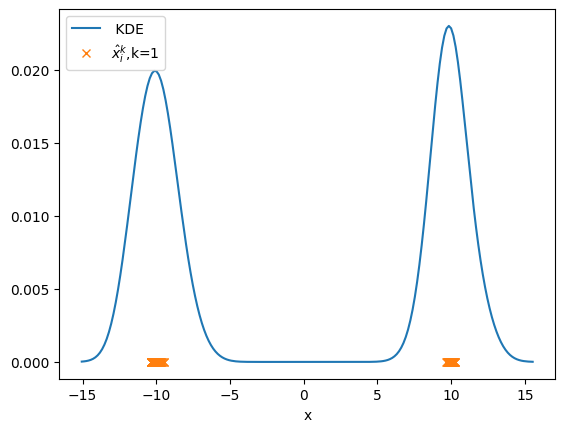

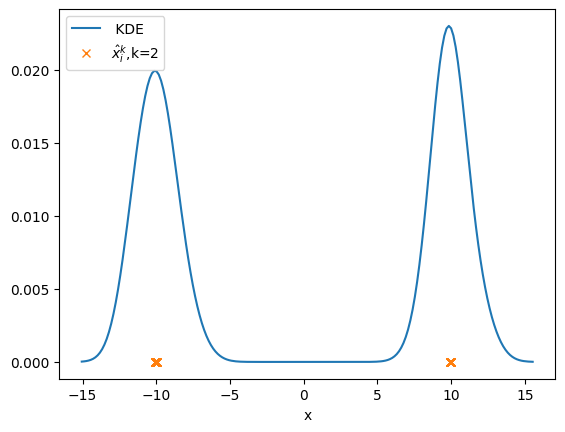

In [76]:
Xhat=np.copy(S.reshape(-1,1))
S_=S.reshape(-1,1)


for k in range(3):
    plt.plot(x,density,label=" KDE")
    plt.plot(Xhat,np.zeros((200,1)),'x',label="$\hat{x}^{k}_i$,k="+str(k))
    plt.xlabel('x')
    plt.legend()
    plt.show()
  
    for i,xhat in enumerate(Xhat):
        dist=np.sqrt(((xhat-S_)**2).sum(1))
        weight = gaussian(dist, 2.5)
        Xhat[i] = (weight.reshape(-1,1)*S_).sum(0) / weight.sum()
    

In practice, we will drop many of the data points, as they get closer together. Here is a quick way. 


In [77]:
np.unique(Xhat.astype(int))

array([-10,   9])

<h2>Authors</h2>


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01">Joseph Santarcangelo </a> has a Ph.D. in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


### Other Contributors


[Roxanne Li](https://www.linkedin.com/in/roxanne-li/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) is a Data Science intern at IBM Skills Network, entering level-5 study in the Mathematics & Statistics undergraduate Coop program at McMaster University.


<h2>Change Log</h2>


<table>
    <tr>
        <th>Date (YYYY-MM-DD)</th>
        <th>Version</th>
        <th>Changed By</th>
        <th>Change Description</th>
    </tr>
    <tr>
        <td>2022-02-03</td>
        <td>0.1</td>
        <td>Joseph</td>
        <td>First commit</td>
    </tr>
    <tr>
        <td>2022-02-15</td>
        <td>0.1</td>
        <td>Svitlana Kramar</td>
        <td>Edited Introductions</td>
    </tr>
    <tr>
        <td>2022-05-25</td>
        <td>0.2</td>
        <td>Roxanne Li</td>
        <td>Review and edit</td>
    </tr>
     <tr>
        <td>2022-07-18</td>
        <td>0.2</td>
        <td>Svitlana Kramar</td>
        <td>Final Edit</td>
    </tr>
</table>


Copyright © 2020 IBM Corporation. All rights reserved.
